<a href="https://colab.research.google.com/github/keedjk7/Machine-Learning/blob/main/Activity11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import Input
from keras.layers import Embedding
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Data Preparation

In [ ]:
# Read data from 2 files:
df_R = pd.read_csv('./ml-25m/ratings.csv')
df_M = pd.read_csv('./ml-25m/movies.csv')

In [ ]:
df_R

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [ ]:
df_M

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
df = df_R.merge(df_M)
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama


In [ ]:
seed=339
df_train,df_test = model_selection.train_test_split(df,test_size=0.3,random_state=seed,stratify=df['rating'])

In [ ]:
df_train

,userId,movieId,rating,timestamp,title,genres
19311501,159375,916,4.0,938954209,Roman Holiday (1953),Comedy|Drama|Romance
10109714,73783,435,4.0,1200566924,Coneheads (1993),Comedy|Sci-Fi
2453803,129367,1968,1.0,953916553,"Breakfast Club, The (1985)",Comedy|Drama
3181156,139197,4016,4.5,1156198422,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
6682199,133646,30793,3.5,1436437192,Charlie and the Chocolate Factory (2005),Adventure|Children|Comedy|Fantasy|IMAX
...,...,...,...,...,...,...
15501760,145216,70,3.5,1168632224,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
10559960,124461,1097,4.0,879433255,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi
8607400,17016,107348,2.5,1463477796,Anchorman 2: The Legend Continues (2013),Comedy
7484569,76141,59315,4.5,1382365082,Iron Man (2008),Action|Adventure|Sci-Fi


In [ ]:
df_test

,userId,movieId,rating,timestamp,title,genres
21197506,126457,2416,3.5,1092352753,Back to School (1986),Comedy
19534098,30863,166461,4.0,1499653082,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy
5665360,158744,4262,5.0,1561684700,Scarface (1983),Action|Crime|Drama
4098,8434,296,4.5,1107675064,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
8110554,83650,81834,3.0,1501179317,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX
...,...,...,...,...,...,...
18776840,33492,94,4.0,866469532,Beautiful Girls (1996),Comedy|Drama|Romance
1440427,148988,588,3.5,1213049135,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
19748833,130388,550,2.0,1125070168,Threesome (1994),Comedy|Romance
14553627,45744,2706,3.0,1164760367,American Pie (1999),Comedy|Romance


In [ ]:
# # Re-numbering userId
userId_list = df['userId'].unique()
userId_list

array([    1,     3,     4, ..., 18247, 16557,  6597], dtype=int64)

In [ ]:
# # Re-numbering userId
index = 0
dict_users={}
for ids in sorted(userId_list):
    dict_users[ids] = index
    index += 1

In [ ]:
index

162541

In [ ]:
dict_users

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [ ]:
# # Re-numbering movideId
movieId_list = df['movieId'].unique()
movieId_list

array([   296,    306,    307, ..., 139970, 200726, 200728], dtype=int64)

In [ ]:
# # Re-numbering movieId
index2 = 0
dict_movies={}
for ids in sorted(movieId_list):
    dict_movies[ids] = index2
    index2 += 1

In [ ]:
index2

59047

In [ ]:
dict_movies

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 92: 90,
 93: 91,
 94: 92,
 95: 93,
 96: 94,
 97: 95,
 98: 96,
 99: 97,
 100: 98,
 101: 99,
 102: 100,
 103: 101,
 104: 102,
 105: 103,
 106: 104,
 107: 105,
 108: 106,
 109: 107,
 110: 108,
 111: 109,
 112: 1

In [ ]:
df_train

,userId,movieId,rating,timestamp,title,genres
19311501,159375,916,4.0,938954209,Roman Holiday (1953),Comedy|Drama|Romance
10109714,73783,435,4.0,1200566924,Coneheads (1993),Comedy|Sci-Fi
2453803,129367,1968,1.0,953916553,"Breakfast Club, The (1985)",Comedy|Drama
3181156,139197,4016,4.5,1156198422,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
6682199,133646,30793,3.5,1436437192,Charlie and the Chocolate Factory (2005),Adventure|Children|Comedy|Fantasy|IMAX
...,...,...,...,...,...,...
15501760,145216,70,3.5,1168632224,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
10559960,124461,1097,4.0,879433255,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi
8607400,17016,107348,2.5,1463477796,Anchorman 2: The Legend Continues (2013),Comedy
7484569,76141,59315,4.5,1382365082,Iron Man (2008),Action|Adventure|Sci-Fi


In [ ]:
#Map new id to train,validation for both 'userID','movieID'
df_train['userId'] = df_train['userId'].map(df['userId'])
df_train[['userId']]

,userId
19311501,53454
10109714,150360
2453803,143549
3181156,54340
6682199,117679
...,...
15501760,130671
10559960,155771
8607400,34834
7484569,155193


In [ ]:
df_train['movieId'] = df_train['movieId'].map(df['movieId'])
df_train[['movieId']]

,movieId
19311501,296
10109714,296
2453803,296
3181156,296
6682199,296
...,...
15501760,296
10559960,296
8607400,1088
7484569,296


In [ ]:
df_train

,userId,movieId,rating,timestamp,title,genres
19311501,53454,296,4.0,938954209,Roman Holiday (1953),Comedy|Drama|Romance
10109714,150360,296,4.0,1200566924,Coneheads (1993),Comedy|Sci-Fi
2453803,143549,296,1.0,953916553,"Breakfast Club, The (1985)",Comedy|Drama
3181156,54340,296,4.5,1156198422,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
6682199,117679,296,3.5,1436437192,Charlie and the Chocolate Factory (2005),Adventure|Children|Comedy|Fantasy|IMAX
...,...,...,...,...,...,...
15501760,130671,296,3.5,1168632224,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
10559960,155771,296,4.0,879433255,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi
8607400,34834,1088,2.5,1463477796,Anchorman 2: The Legend Continues (2013),Comedy
7484569,155193,296,4.5,1382365082,Iron Man (2008),Action|Adventure|Sci-Fi


In [ ]:
#Map new id to train,validation for both 'userID','movieID'
df_test['userId'] = df_test['userId'].map(df['userId'])
df_test[['userId']]

,userId
21197506,52917
19534098,62950
5665360,48305
4098,17246
8110554,91608
...,...
18776840,68410
1440427,45282
19748833,13838
14553627,93481


In [ ]:
df_test['movieId'] = df_test['movieId'].map(df['movieId'])
df_test[['movieId']]

,movieId
21197506,296
19534098,1653
5665360,296
4098,296
8110554,306
...,...
18776840,296
1440427,296
19748833,296
14553627,296


In [ ]:
df_test

,userId,movieId,rating,timestamp,title,genres
21197506,52917,296,3.5,1092352753,Back to School (1986),Comedy
19534098,62950,1653,4.0,1499653082,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy
5665360,48305,296,5.0,1561684700,Scarface (1983),Action|Crime|Drama
4098,17246,296,4.5,1107675064,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
8110554,91608,306,3.0,1501179317,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX
...,...,...,...,...,...,...
18776840,68410,296,4.0,866469532,Beautiful Girls (1996),Comedy|Drama|Romance
1440427,45282,296,3.5,1213049135,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
19748833,13838,296,2.0,1125070168,Threesome (1994),Comedy|Romance
14553627,93481,296,3.0,1164760367,American Pie (1999),Comedy|Romance


In [ ]:
df_train[df_train['userId']==9]

,userId,movieId,rating,timestamp,title,genres
5169587,9,296,4.0,1498091345,Fight Club (1999),Action|Crime|Drama|Thriller
648725,9,296,5.0,1498091442,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4900769,9,296,5.0,1498091486,"Big Lebowski, The (1998)",Comedy|Crime
12710705,9,296,5.0,1498091504,Amadeus (1984),Drama
17504862,9,296,2.0,1165578326,"Pelican Brief, The (1993)",Crime|Drama|Mystery|Romance|Thriller
285210,9,296,3.5,1498091399,Requiem for a Dream (2000),Drama
17210774,9,296,4.5,1165578437,Manon of the Spring (Manon des sources) (1986),Drama
8657899,9,1088,3.5,1498091385,Interstellar (2014),Sci-Fi|IMAX
4375717,9,296,5.0,1498091408,Trainspotting (1996),Comedy|Crime|Drama
968992,9,296,3.5,1498091343,"Shawshank Redemption, The (1994)",Crime|Drama


# Model Preparation and Training

In [ ]:
# Create Model NCF
EMBEDDING_SIZE=1
users_input = Input(shape=(1,), name="users_input")
users_embedding = Embedding(len(userId_list) + 1, EMBEDDING_SIZE, name="users_embeddings")(users_input)
users_bias = Embedding(len(userId_list) + 1, 1, name="users_bias")(users_input) 
movies_input = Input(shape=(1,), name="movies_input")
movies_embedding = Embedding(len(movieId_list) + 1, EMBEDDING_SIZE, name="movies_embeddings")(movies_input)
movies_bias = Embedding(len(movieId_list) + 1, 1, name="movies_bias")(movies_input)
dot_product_users_movies = tf.math.multiply(users_embedding, movies_embedding)
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = Flatten(name="fl_inputs")(input_terms)
output = Dense(1, activation="relu", name="output")(input_terms)
model = Model(inputs=[users_input, movies_input], outputs=output)
opt_adam = Adam(lr = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

c:\Python36\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Model Summary and Traing

In [ ]:
#view model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 1)         162542      ['users_input[0][0]']            
                                                                                                  
 movies_embeddings (Embedding)  (None, 1, 1)         59048       ['movies_input[0][0]']           
                                                                                            

In [ ]:
#--------Training Model-----------
BS=[64,128,256,512,1024,2048] #try at least 3 values
EP=[5,10,20,50,60] #try at least 3 values
history = model.fit(
    x=[df_train['userId'],df_train['movieId']],
    y=df_train['rating'],
    batch_size=1024,
    epochs=20,
    verbose=1,
    validation_data=([df_test['userId'],df_test['movieId']],df_test['rating'])
)

Epoch 1/20
17090/17090 [==============================] - 42s 2ms/step - loss: 0.9793 - mean_absolute_error: 0.7725 - val_loss: 0.9684 - val_mean_absolute_error: 0.7667
Epoch 2/20
17090/17090 [==============================] - 35s 2ms/step - loss: 0.9634 - mean_absolute_error: 0.7649 - val_loss: 0.9639 - val_mean_absolute_error: 0.7639
Epoch 3/20
17090/17090 [==============================] - 41s 2ms/step - loss: 0.9592 - mean_absolute_error: 0.7627 - val_loss: 0.9629 - val_mean_absolute_error: 0.7618
Epoch 4/20
17090/17090 [==============================] - 44s 3ms/step - loss: 0.9571 - mean_absolute_error: 0.7616 - val_loss: 0.9614 - val_mean_absolute_error: 0.7623
Epoch 5/20
17090/17090 [==============================] - 41s 2ms/step - loss: 0.9557 - mean_absolute_error: 0.7608 - val_loss: 0.9608 - val_mean_absolute_error: 0.7623
Epoch 6/20
17090/17090 [==============================] - 46s 3ms/step - loss: 0.9547 - mean_absolute_error: 0.7603 - val_loss: 0.9610 - val_mean_absolute_

#Model Performance Evaluation

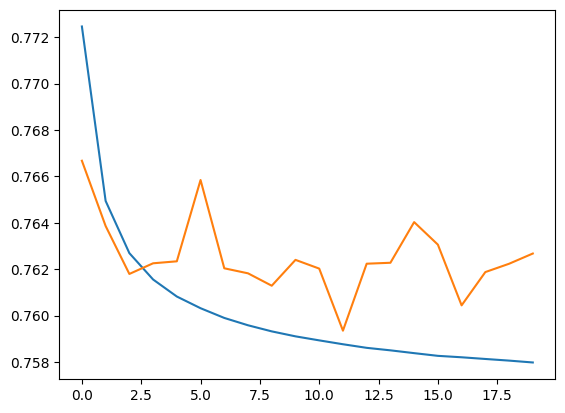

In [ ]:
# ------------ Visualize loss -------------------------------
plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])

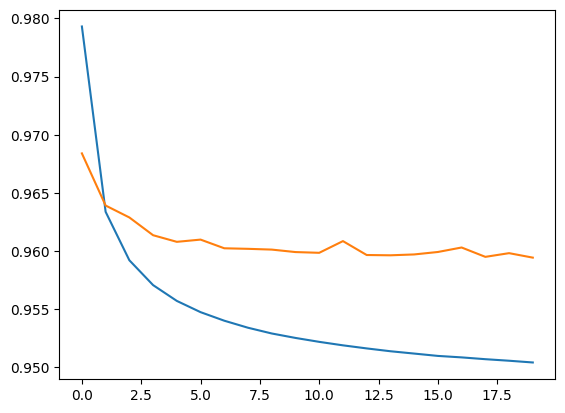

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
# ------------ Model Prediction -------------------------------
userPredictR = pd.DataFrame(model.predict([df_test['userId'], df_test['movieId']]))

234376/234376 [==============================] - 179s 762us/step
